<a href="https://colab.research.google.com/github/SethmaNW/e19-co544-Concentration-Difficulty-Prediction-Model/blob/main/Logistic_Regression_Performance_Improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train_data_smoted = pd.read_csv('/content/data/train_set_smote.csv')
test_data = pd.read_csv('/content/data/test_set.csv')


In [ ]:
X_train_smote = train_data_smoted.drop('Difficulty_level', axis=1)
y_train_smote = train_data_smoted['Difficulty_level']

In [ ]:
X_test = test_data.drop('Difficulty_level', axis=1)
y_test = test_data['Difficulty_level']

In [ ]:
model = LogisticRegression(random_state=4, max_iter=10000)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.625

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.78      0.67        18
           1       0.82      0.61      0.70        66
           2       0.26      0.50      0.34        12

    accuracy                           0.62        96
   macro avg       0.55      0.63      0.57        96
weighted avg       0.70      0.62      0.65        96



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

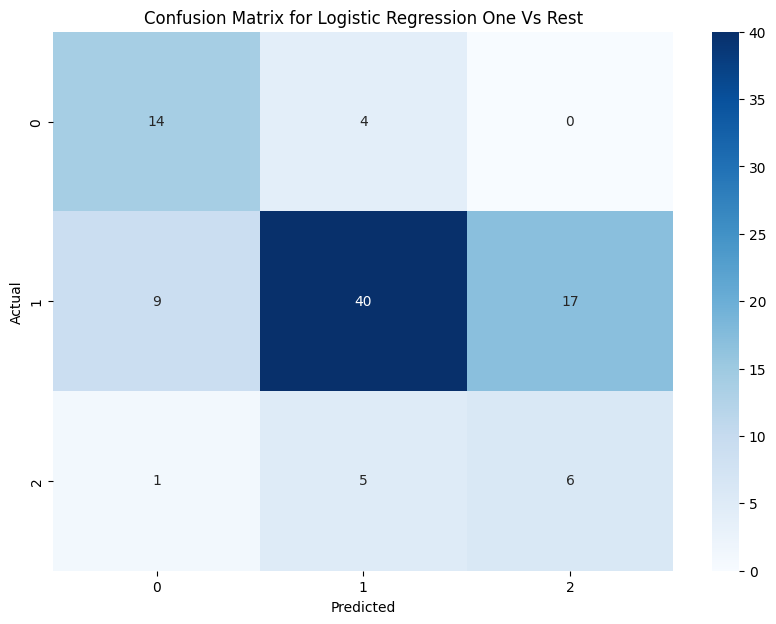

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Logistic Regression One Vs Rest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:


# Initialize the logistic regression model with softmax (multinomial logistic regression)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=4)

# Train the model
model.fit(X_train_smote, y_train_smote)






LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=4)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.625

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.78      0.67        18
           1       0.82      0.61      0.70        66
           2       0.26      0.50      0.34        12

    accuracy                           0.62        96
   macro avg       0.55      0.63      0.57        96
weighted avg       0.70      0.62      0.65        96



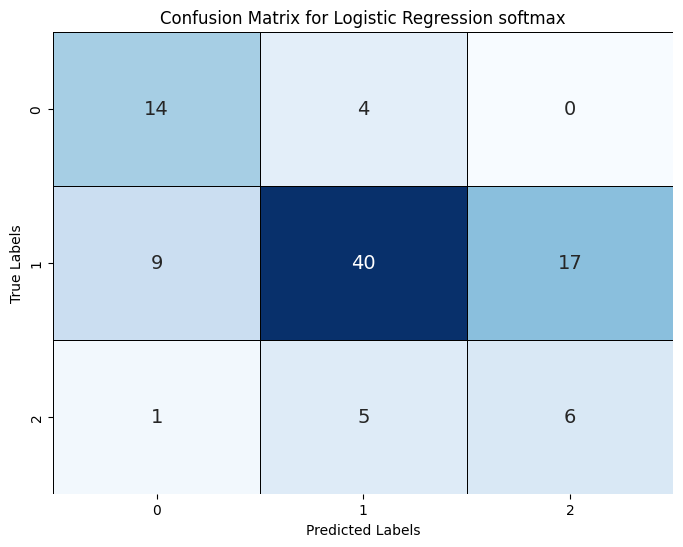

In [ ]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression softmax')
plt.show()

Optimizing Logistic Regression with Hyperparameter Tuning  and Standardization for Multi-class Classification

Best Parameters: {'C': 0.01}
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.78      0.62        18
           1       0.79      0.58      0.67        66
           2       0.24      0.42      0.30        12

    accuracy                           0.59        96
   macro avg       0.52      0.59      0.53        96
weighted avg       0.67      0.59      0.61        96

Accuracy: 0.59375


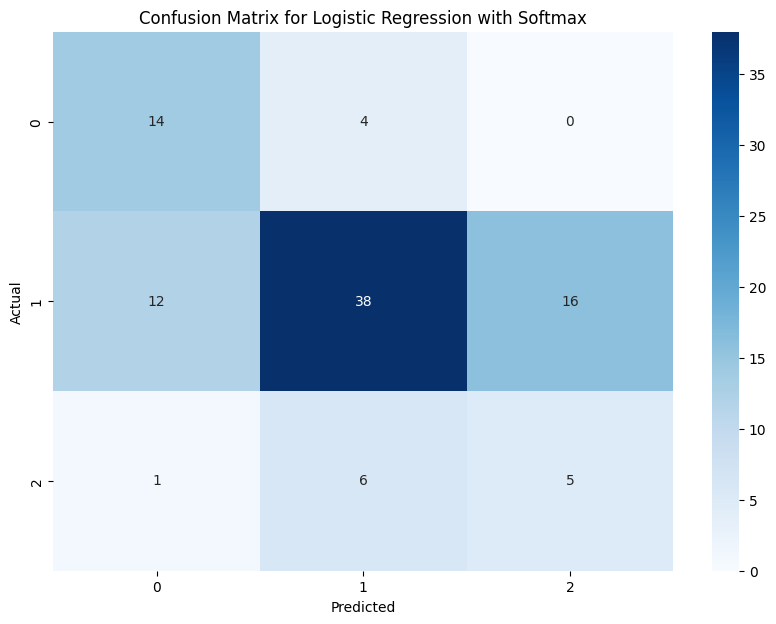

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the SMOTE-resampled training dataset
smote_train_df = pd.read_csv('/content/data/train_set_smote.csv')
# Load the separate test datase
test_df = pd.read_csv('/content/data/test_set.csv')

# Split
X_train = smote_train_df.drop('Difficulty_level', axis=1)
y_train = smote_train_df['Difficulty_level']

# Split the test data
X_test = test_df.drop('Difficulty_level', axis=1)
y_test = test_df['Difficulty_level']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Grid search for hyperparameter optimization
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Print the best parameters and classification report
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualize the confusion matrix

cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Logistic Regression with Softmax')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Enhancing Logistic Regression with Randomized Search and Standardization for Multi-class Classification



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sa

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.46415888336127775}
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        18
           1       0.85      0.62      0.72        66
           2       0.29      0.58      0.39        12

    accuracy                           0.66        96
   macro avg       0.59      0.68      0.61        96
weighted avg       0.74      0.66      0.68        96

Accuracy: 0.65625


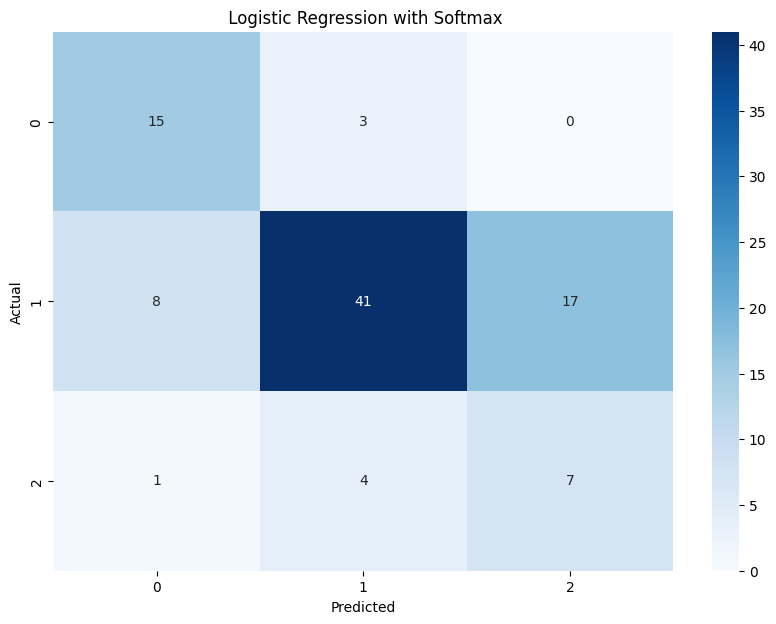

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the SMOTE-resampled training dataset
smote_train_df = pd.read_csv('/content/data/train_set_smote.csv')
# Load the separate test dataset
test_df = pd.read_csv('/content/data/test_set.csv')

# Split
X_train = smote_train_df.drop('Difficulty_level', axis=1)
y_train = smote_train_df['Difficulty_level']

# Split the test data
X_test = test_df.drop('Difficulty_level', axis=1)
y_test = test_df['Difficulty_level']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Grid search for hyperparameter optimization
param_distributions = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}
random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Get the best model and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Print the best parameters and classification report
print("Best Parameters:", random_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title(' Logistic Regression with Softmax')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Optimizing Logistic Regression with ElasticNet Regularization and Grid Search for Multi-class Classification

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 0.01, 'l1_ratio': 0.3}
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76        37
           1       0.74      0.43      0.54        54
           2       0.67      0.82      0.73        44

    accuracy                           0.68       135
   macro avg       0.69      0.71      0.68       135
weighted avg       0.69      0.68      0.66       135



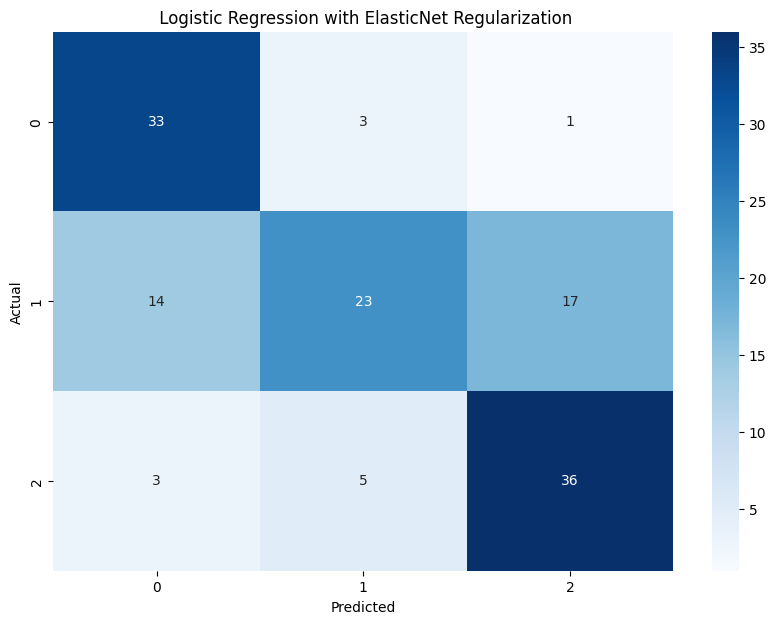

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the  training dataset
smote_train_df = pd.read_csv('/content/data/train_set_smote.csv')


X = smote_train_df.drop('Difficulty_level', axis=1)
y = smote_train_df['Difficulty_level']




# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define logistic regression model with ElasticNet regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial', max_iter=1000)

# Grid search for hyperparameter optimization
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best model
best_model = grid_search.best_estimator_


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the best model on the training data
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))


#  confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title(' Logistic Regression with ElasticNet Regularization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 0.01, 'l1_ratio': 0.3}
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.72      0.59        18
           1       0.79      0.50      0.61        66
           2       0.25      0.58      0.35        12

    accuracy                           0.55        96
   macro avg       0.51      0.60      0.52        96
weighted avg       0.67      0.55      0.57        96

Accuracy: 0.5520833333333334


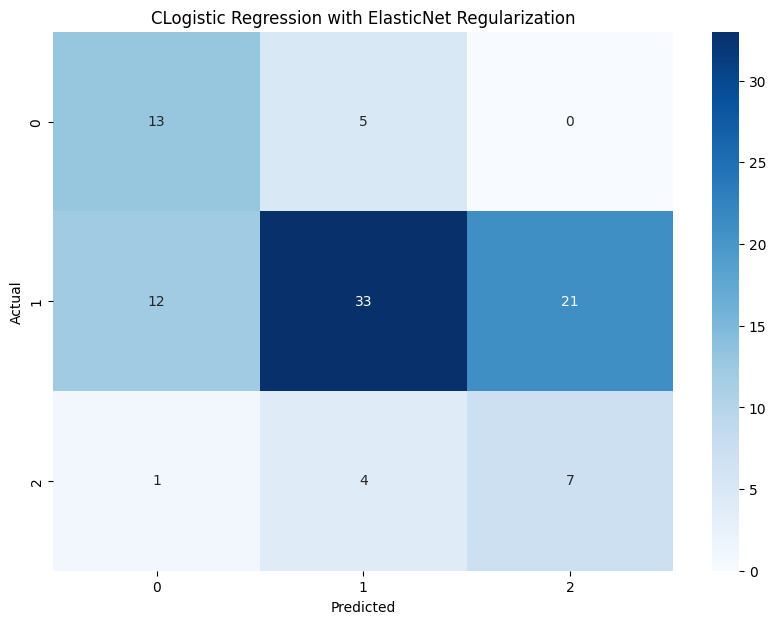

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the SMOTE balanced training dataset and test dataset
train_df = pd.read_csv('/content/data/train_set_smote.csv')
test_df = pd.read_csv('/content/data/test_set.csv')


X_train = train_df.drop('Difficulty_level', axis=1)
y_train = train_df['Difficulty_level']


X_test = test_df.drop('Difficulty_level', axis=1)
y_test = test_df['Difficulty_level']

# Standardize features based on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define logistic regression model with ElasticNet regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial', max_iter=1000)

# Grid search for hyperparameter optimization
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('CLogistic Regression with ElasticNet Regularization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
